
- ALAGOANOVA	PB 2020
- BAÍADATRAIÇÃO	PB 2025
- BANANEIRAS	PB 2020
- CABACEIRAS	PB 2022
- CAMPINAGRANDE	PB 2020
- CATURITÉ	PB 2021
- GUARABIRA	PB 2020
- INGÁ	PB 2020
- ITATUBA	PB 2022
- JOÃOPESSOA	PB 2022
- LAGOASECA	PB 2021 ha 2024
- MOGEIRO	PB 2020
- QUEIMADAS	PB 2022
- SANTARITA	PB 2020
- SERRAREDONDA	PB 2020


In [85]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
# caminho relativo
pasta = Path("tabelas")

# arquivo final
df = Path("tabelas/divulgacao_anos_iniciais_municipios_2023.xlsx")

# lê a planilha
ideb = pd.read_excel(df, skiprows= 9)

ideb


,SG_UF,CO_MUNICIPIO,NO_MUNICIPIO,REDE,VL_APROVACAO_2005_SI_4,VL_APROVACAO_2005_SI,VL_APROVACAO_2005_1,VL_APROVACAO_2005_2,VL_APROVACAO_2005_3,VL_APROVACAO_2005_4,...,VL_OBSERVADO_2021,VL_OBSERVADO_2023,VL_PROJECAO_2007,VL_PROJECAO_2009,VL_PROJECAO_2011,VL_PROJECAO_2013,VL_PROJECAO_2015,VL_PROJECAO_2017,VL_PROJECAO_2019,VL_PROJECAO_2021
0,RO,1100015.0,Alta Floresta D'Oeste,Estadual,77.2,-,70.4,78.2,73.7,82.5,...,4.6,5.9,3.6,3.9,4.3,4.6,4.9,5.2,5.5,5.7
1,RO,1100015.0,Alta Floresta D'Oeste,Municipal,-,-,-,-,-,-,...,4.8,5.1,-,-,-,-,-,5.3,5.5,5.8
2,RO,1100015.0,Alta Floresta D'Oeste,Pública,80.9,-,73,81.5,81.1,87.9,...,4.8,5.3,3.8,4.1,4.5,4.8,5.1,5.4,5.7,5.9
3,RO,1100023.0,Ariquemes,Estadual,87.1,-,83.3,88.6,88.5,87.5,...,5.8,6.1,4.1,4.4,4.8,5.1,5.4,5.6,5.9,6.2
4,RO,1100023.0,Ariquemes,Municipal,85.7,93,79,87.3,86.1,87.4,...,4.5,5.3,3.6,3.9,4.3,4.6,4.9,5.2,5.5,5.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14509,que foram definidas (https://download.inep.gov...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14510,federado de 2007 até 2021;,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14511,"(4) Com o fim do primeiro ciclo do Ideb, o Ine...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14512,informações ver Portaria nº 26 de 29/01/2024 (...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
ideb.columns


Index(['SG_UF', 'CO_MUNICIPIO', 'NO_MUNICIPIO', 'REDE',
       'VL_APROVACAO_2005_SI_4', 'VL_APROVACAO_2005_SI', 'VL_APROVACAO_2005_1',
       'VL_APROVACAO_2005_2', 'VL_APROVACAO_2005_3', 'VL_APROVACAO_2005_4',
       ...
       'VL_OBSERVADO_2021', 'VL_OBSERVADO_2023', 'VL_PROJECAO_2007',
       'VL_PROJECAO_2009', 'VL_PROJECAO_2011', 'VL_PROJECAO_2013',
       'VL_PROJECAO_2015', 'VL_PROJECAO_2017', 'VL_PROJECAO_2019',
       'VL_PROJECAO_2021'],
      dtype='object', length=122)

In [87]:
# Limpar espaços extras
ideb.columns = ideb.columns.str.strip()

# Colunas de interesse do IDEB
lista_ideb = [f'VL_OBSERVADO_{x}' for x in range(2007, 2025, 2)]
nomes_ideb = [f'IDEB_{x}' for x in range(2007, 2025, 2)]
# Inclui também CO_MUNICIPIO
colunas_final = ['CO_MUNICIPIO', 'NO_MUNICIPIO', 'REDE', 'SG_UF'] + lista_ideb

# Selecionar apenas as colunas finais
ideb = ideb[colunas_final]

# Renomear colunas
ideb = ideb.rename(columns={'NO_MUNICIPIO': 'MUNICIPIO', **dict(zip(lista_ideb, nomes_ideb))})

# Filtrar apenas Paraíba e rede municipal
ideb_pb_municipal = ideb[
    (ideb['REDE'].str.strip().str.lower() == 'municipal')
].copy()  # .copy() para evitar SettingWithCopyWarning

# Padronizar nomes dos municípios
ideb_pb_municipal['MUNICIPIO'] = ideb_pb_municipal['MUNICIPIO'].str.upper().str.strip()

# Visualizar resultado
ideb_pb_municipal


,CO_MUNICIPIO,MUNICIPIO,REDE,SG_UF,IDEB_2007,IDEB_2009,IDEB_2011,IDEB_2013,IDEB_2015,IDEB_2017,IDEB_2019,IDEB_2021,IDEB_2023
1,1100015.0,ALTA FLORESTA D'OESTE,Municipal,RO,-,-,-,-,5,5.1,4.7,4.8,5.1
4,1100023.0,ARIQUEMES,Municipal,RO,3.7,4.2,4.4,4.8,5,5.4,5.1,4.5,5.3
7,1100031.0,CABIXI,Municipal,RO,3.9,4.6,5.1,5.6,5.3,6.1,5.1,5.1,5.8
10,1100049.0,CACOAL,Municipal,RO,4.3,4.5,5.2,5.8,5.8,6.1,5.6,5.6,5.4
13,1100056.0,CEREJEIRAS,Municipal,RO,4.1,4.7,5.1,5.3,5.4,6,6.1,5.5,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14483,5221908.0,VARJÃO,Municipal,GO,3.9,4.1,5.2,5.3,4.2,5.3,6.1,6.1,6.5
14486,5222005.0,VIANÓPOLIS,Municipal,GO,4.2,4.8,5.5,5.8,6,6.5,6.7,6,6.8
14489,5222054.0,VICENTINÓPOLIS,Municipal,GO,4.4,4.9,5.2,5.5,6.1,6.7,6.4,5.9,7.1
14491,5222203.0,VILA BOA,Municipal,GO,3.5,3.6,4,4.3,4.6,5,5.2,5.3,4.8


In [88]:
ideb = ideb_pb_municipal

ideb


,CO_MUNICIPIO,MUNICIPIO,REDE,SG_UF,IDEB_2007,IDEB_2009,IDEB_2011,IDEB_2013,IDEB_2015,IDEB_2017,IDEB_2019,IDEB_2021,IDEB_2023
1,1100015.0,ALTA FLORESTA D'OESTE,Municipal,RO,-,-,-,-,5,5.1,4.7,4.8,5.1
4,1100023.0,ARIQUEMES,Municipal,RO,3.7,4.2,4.4,4.8,5,5.4,5.1,4.5,5.3
7,1100031.0,CABIXI,Municipal,RO,3.9,4.6,5.1,5.6,5.3,6.1,5.1,5.1,5.8
10,1100049.0,CACOAL,Municipal,RO,4.3,4.5,5.2,5.8,5.8,6.1,5.6,5.6,5.4
13,1100056.0,CEREJEIRAS,Municipal,RO,4.1,4.7,5.1,5.3,5.4,6,6.1,5.5,5.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14483,5221908.0,VARJÃO,Municipal,GO,3.9,4.1,5.2,5.3,4.2,5.3,6.1,6.1,6.5
14486,5222005.0,VIANÓPOLIS,Municipal,GO,4.2,4.8,5.5,5.8,6,6.5,6.7,6,6.8
14489,5222054.0,VICENTINÓPOLIS,Municipal,GO,4.4,4.9,5.2,5.5,6.1,6.7,6.4,5.9,7.1
14491,5222203.0,VILA BOA,Municipal,GO,3.5,3.6,4,4.3,4.6,5,5.2,5.3,4.8


In [89]:
ideb.columns

Index(['CO_MUNICIPIO', 'MUNICIPIO', 'REDE', 'SG_UF', 'IDEB_2007', 'IDEB_2009',
       'IDEB_2011', 'IDEB_2013', 'IDEB_2015', 'IDEB_2017', 'IDEB_2019',
       'IDEB_2021', 'IDEB_2023'],
      dtype='object')

In [90]:

# caminho relativo
pasta = Path("tabelas")

# arquivo final
df = pasta / "POP2020_20220905(Municípios).csv"

# lê o CSV
pop = pd.read_csv(df, sep=";", encoding="latin1", skiprows= 1, )  # sep e encoding podem variar

#renomera a coluna 
pop = pop.rename(columns={'NOME DO MUNICÍPIO': 'MUNICIPIO' })

# Padronizar nomes dos municípios
pop['MUNICIPIO'] = pop['MUNICIPIO'].str.upper().str.strip()

# mantém apenas as linhas até a 5572
pop = pop.iloc[:5570, :]

pop



,UF,COD. UF,COD. MUNIC,MUNICIPIO,POPULAÇÃO ESTIMADA
0,RO,11.0,15.0,ALTA FLORESTA D'OESTE,22.728
1,RO,11.0,23.0,ARIQUEMES,109.523
2,RO,11.0,31.0,CABIXI,5.188
3,RO,11.0,49.0,CACOAL,85.893
4,RO,11.0,56.0,CEREJEIRAS,16.204
...,...,...,...,...,...
5565,GO,52.0,22005.0,VIANÓPOLIS,13.977
5566,GO,52.0,22054.0,VICENTINÓPOLIS,8.873
5567,GO,52.0,22203.0,VILA BOA,6.312
5568,GO,52.0,22302.0,VILA PROPÍCIO,5.882


In [91]:
pop.columns

Index(['UF', 'COD. UF', 'COD. MUNIC', 'MUNICIPIO', ' POPULAÇÃO ESTIMADA '], dtype='object')

In [92]:
df = pd.merge(
    ideb,
    pop.rename(columns={" POPULAÇÃO ESTIMADA ": "POPULACAO_ESTIMADA"}),
    on="MUNICIPIO",
    how="left"
)

df_final = df.drop_duplicates(subset=["MUNICIPIO", "SG_UF"])



df

,CO_MUNICIPIO,MUNICIPIO,REDE,SG_UF,IDEB_2007,IDEB_2009,IDEB_2011,IDEB_2013,IDEB_2015,IDEB_2017,IDEB_2019,IDEB_2021,IDEB_2023,UF,COD. UF,COD. MUNIC,POPULACAO_ESTIMADA
0,1100015.0,ALTA FLORESTA D'OESTE,Municipal,RO,-,-,-,-,5,5.1,4.7,4.8,5.1,RO,11.0,15.0,22.728
1,1100023.0,ARIQUEMES,Municipal,RO,3.7,4.2,4.4,4.8,5,5.4,5.1,4.5,5.3,RO,11.0,23.0,109.523
2,1100031.0,CABIXI,Municipal,RO,3.9,4.6,5.1,5.6,5.3,6.1,5.1,5.1,5.8,RO,11.0,31.0,5.188
3,1100049.0,CACOAL,Municipal,RO,4.3,4.5,5.2,5.8,5.8,6.1,5.6,5.6,5.4,RO,11.0,49.0,85.893
4,1100056.0,CEREJEIRAS,Municipal,RO,4.1,4.7,5.1,5.3,5.4,6,6.1,5.5,5.6,RO,11.0,56.0,16.204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6070,5221908.0,VARJÃO,Municipal,GO,3.9,4.1,5.2,5.3,4.2,5.3,6.1,6.1,6.5,GO,52.0,21908.0,3.838
6071,5222005.0,VIANÓPOLIS,Municipal,GO,4.2,4.8,5.5,5.8,6,6.5,6.7,6,6.8,GO,52.0,22005.0,13.977
6072,5222054.0,VICENTINÓPOLIS,Municipal,GO,4.4,4.9,5.2,5.5,6.1,6.7,6.4,5.9,7.1,GO,52.0,22054.0,8.873
6073,5222203.0,VILA BOA,Municipal,GO,3.5,3.6,4,4.3,4.6,5,5.2,5.3,4.8,GO,52.0,22203.0,6.312


In [93]:
df.columns

Index(['CO_MUNICIPIO', 'MUNICIPIO', 'REDE', 'SG_UF', 'IDEB_2007', 'IDEB_2009',
       'IDEB_2011', 'IDEB_2013', 'IDEB_2015', 'IDEB_2017', 'IDEB_2019',
       'IDEB_2021', 'IDEB_2023', 'UF', 'COD. UF', 'COD. MUNIC',
       'POPULACAO_ESTIMADA'],
      dtype='object')

In [104]:
df = df_final.drop_duplicates(subset=["MUNICIPIO", "SG_UF"], keep="last")

In [106]:
df

,CO_MUNICIPIO,MUNICIPIO,REDE,SG_UF,IDEB_2007,IDEB_2009,IDEB_2011,IDEB_2013,IDEB_2015,IDEB_2017,IDEB_2019,IDEB_2021,IDEB_2023,UF,COD. UF,COD. MUNIC,POPULACAO_ESTIMADA
0,1100015.0,ALTA FLORESTA D'OESTE,Municipal,RO,-,-,-,-,5,5.1,4.7,4.8,5.1,RO,11.0,15.0,22.728
1,1100023.0,ARIQUEMES,Municipal,RO,3.7,4.2,4.4,4.8,5,5.4,5.1,4.5,5.3,RO,11.0,23.0,109.523
2,1100031.0,CABIXI,Municipal,RO,3.9,4.6,5.1,5.6,5.3,6.1,5.1,5.1,5.8,RO,11.0,31.0,5.188
3,1100049.0,CACOAL,Municipal,RO,4.3,4.5,5.2,5.8,5.8,6.1,5.6,5.6,5.4,RO,11.0,49.0,85.893
4,1100056.0,CEREJEIRAS,Municipal,RO,4.1,4.7,5.1,5.3,5.4,6,6.1,5.5,5.6,RO,11.0,56.0,16.204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6070,5221908.0,VARJÃO,Municipal,GO,3.9,4.1,5.2,5.3,4.2,5.3,6.1,6.1,6.5,GO,52.0,21908.0,3.838
6071,5222005.0,VIANÓPOLIS,Municipal,GO,4.2,4.8,5.5,5.8,6,6.5,6.7,6,6.8,GO,52.0,22005.0,13.977
6072,5222054.0,VICENTINÓPOLIS,Municipal,GO,4.4,4.9,5.2,5.5,6.1,6.7,6.4,5.9,7.1,GO,52.0,22054.0,8.873
6073,5222203.0,VILA BOA,Municipal,GO,3.5,3.6,4,4.3,4.6,5,5.2,5.3,4.8,GO,52.0,22203.0,6.312


## alagoa nova

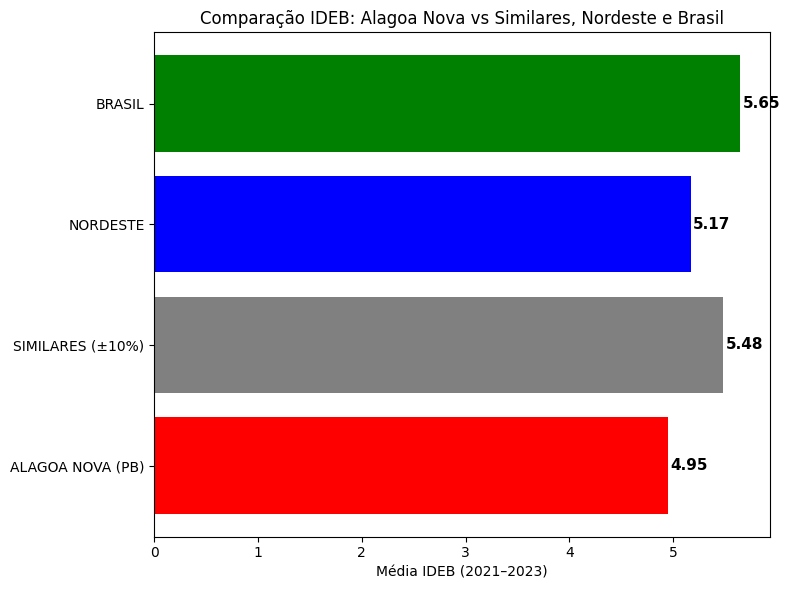

In [112]:

# Converter colunas de IDEB para numéricas
df['IDEB_2021'] = pd.to_numeric(df['IDEB_2021'], errors='coerce')
df['IDEB_2023'] = pd.to_numeric(df['IDEB_2023'], errors='coerce')

# Criar média IDEB (2021–2023)
df['MEDIA_IDEB'] = df[['IDEB_2021', 'IDEB_2023']].mean(axis=1)


# População de Alagoa Nova (PB)
pop_alagoa = df.loc[
    (df['MUNICIPIO'] == "ALAGOA NOVA") & (df['SG_UF'] == "PB"),
    'POPULACAO_ESTIMADA'
].squeeze()

# Intervalo de ±10%
limite_inferior = pop_alagoa * 0.9
limite_superior = pop_alagoa * 1.1

# Selecionar municípios com população semelhante
df_similares = df[(df['POPULACAO_ESTIMADA'] >= limite_inferior) &
                  (df['POPULACAO_ESTIMADA'] <= limite_superior)].copy()

# Calcular médias
media_alagoa = df.loc[
    (df['MUNICIPIO'] == "ALAGOA NOVA") & (df['SG_UF'] == "PB"),
    'MEDIA_IDEB'
].squeeze()

media_similares = df_similares.loc[
    ~((df_similares['MUNICIPIO'] == "ALAGOA NOVA") & (df_similares['SG_UF'] == "PB")),
    'MEDIA_IDEB'
].mean()

# Nordeste
ufs_nordeste = ["AL","BA","CE","MA","PB","PE","PI","RN","SE"]
media_nordeste = df.loc[df['SG_UF'].isin(ufs_nordeste), 'MEDIA_IDEB'].mean()

# Brasil
media_brasil = df['MEDIA_IDEB'].mean()

# DataFrame comparativo
df_comparacao = pd.DataFrame({
    'MUNICIPIO': ['ALAGOA NOVA (PB)', 'SIMILARES (±10%)', 'NORDESTE', 'BRASIL'],
    'MEDIA_IDEB': [media_alagoa, media_similares, media_nordeste, media_brasil]
})

# Gráfico comparativo (horizontal)
cores = ['red', 'gray', 'blue', 'green']
plt.figure(figsize=(8,6))
barras = plt.barh(df_comparacao['MUNICIPIO'], df_comparacao['MEDIA_IDEB'], color=cores)
plt.xlabel("Média IDEB (2021–2023)")
plt.title("Comparação IDEB: Alagoa Nova vs Similares, Nordeste e Brasil")

# Adicionar valores ao lado das barras
for barra in barras:
    largura = barra.get_width()
    plt.text(largura + 0.02, 
             barra.get_y() + barra.get_height()/2, 
             f"{largura:.2f}", 
             va='center', ha='left', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

## baananeiras 


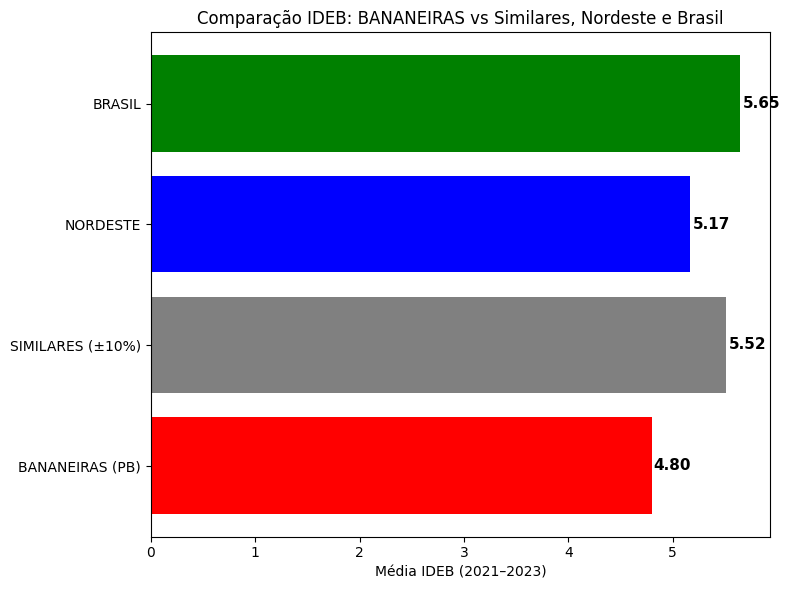

In [113]:
# População de Alagoa Nova (PB)
pop_alagoa = df.loc[
    (df['MUNICIPIO'] == "BANANEIRAS") & (df['SG_UF'] == "PB"),
    'POPULACAO_ESTIMADA'
].squeeze()

# Intervalo de ±10%
limite_inferior = pop_alagoa * 0.9
limite_superior = pop_alagoa * 1.1

# Municípios semelhantes
df_similares = df[(df['POPULACAO_ESTIMADA'] >= limite_inferior) &
                  (df['POPULACAO_ESTIMADA'] <= limite_superior)].copy()

# Médias
media_alagoa = df.loc[
    (df['MUNICIPIO'] == "BANANEIRAS") & (df['SG_UF'] == "PB"),
    'MEDIA_IDEB'
].squeeze()

media_similares = df_similares.loc[
    ~((df_similares['MUNICIPIO'] == "BANANEIRAS") & (df_similares['SG_UF'] == "PB")),
    'MEDIA_IDEB'
].mean()

# Nordeste
ufs_nordeste = ["AL","BA","CE","MA","PB","PE","PI","RN","SE"]
media_nordeste = df.loc[df['SG_UF'].isin(ufs_nordeste), 'MEDIA_IDEB'].mean()

# Brasil
media_brasil = df['MEDIA_IDEB'].mean()

# Comparação final
df_comparacao = pd.DataFrame({
    'MUNICIPIO': ['BANANEIRAS (PB)', 'SIMILARES (±10%)', 'NORDESTE', 'BRASIL'],
    'MEDIA_IDEB': [media_alagoa, media_similares, media_nordeste, media_brasil]
})

# Gráfico comparativo (horizontal)
cores = ['red', 'gray', 'blue', 'green']
plt.figure(figsize=(8,6))
barras = plt.barh(df_comparacao['MUNICIPIO'], df_comparacao['MEDIA_IDEB'], color=cores)
plt.xlabel("Média IDEB (2021–2023)")
plt.title("Comparação IDEB: BANANEIRAS vs Similares, Nordeste e Brasil")

# Adicionar valores ao lado das barras
for barra in barras:
    largura = barra.get_width()
    plt.text(largura + 0.02, 
             barra.get_y() + barra.get_height()/2, 
             f"{largura:.2f}", 
             va='center', ha='left', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


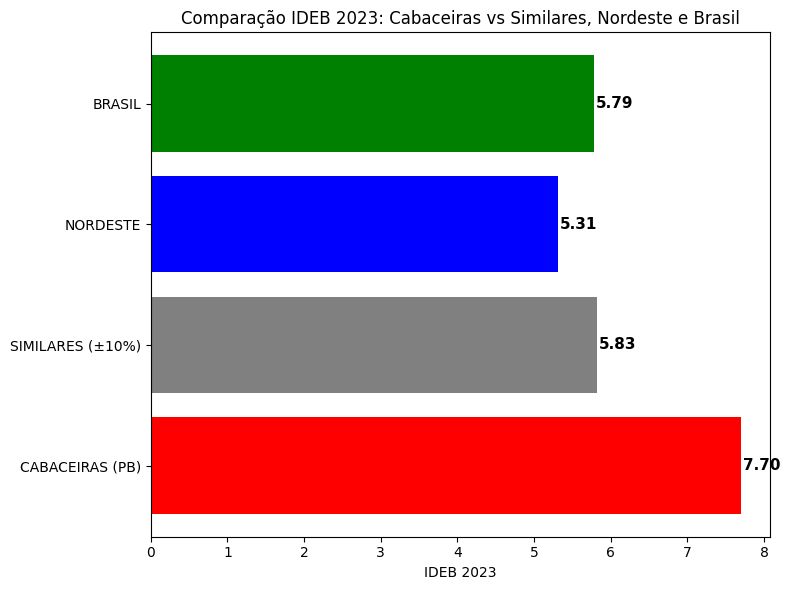

In [114]:
# Converter IDEB 2023 para numérico (garantia)
df['IDEB_2023'] = pd.to_numeric(df['IDEB_2023'], errors='coerce')

# População de Cabaceiras (PB)
pop_alagoa = df.loc[
    (df['MUNICIPIO'] == "CABACEIRAS") & (df['SG_UF'] == "PB"),
    'POPULACAO_ESTIMADA'
].squeeze()

# Intervalo de ±10%
limite_inferior = pop_alagoa * 0.9
limite_superior = pop_alagoa * 1.1

# Municípios semelhantes
df_similares = df[(df['POPULACAO_ESTIMADA'] >= limite_inferior) &
                  (df['POPULACAO_ESTIMADA'] <= limite_superior)].copy()

# IDEB 2023
ideb_cabaceiras = df.loc[
    (df['MUNICIPIO'] == "CABACEIRAS") & (df['SG_UF'] == "PB"),
    'IDEB_2023'
].squeeze()

ideb_similares = df_similares.loc[
    ~((df_similares['MUNICIPIO'] == "CABACEIRAS") & (df_similares['SG_UF'] == "PB")),
    'IDEB_2023'
].mean()

# Nordeste
ufs_nordeste = ["AL","BA","CE","MA","PB","PE","PI","RN","SE"]
ideb_nordeste = df.loc[df['SG_UF'].isin(ufs_nordeste), 'IDEB_2023'].mean()

# Brasil
ideb_brasil = df['IDEB_2023'].mean()

# Comparação final
df_comparacao = pd.DataFrame({
    'MUNICIPIO': ['CABACEIRAS (PB)', 'SIMILARES (±10%)', 'NORDESTE', 'BRASIL'],
    'IDEB_2023': [ideb_cabaceiras, ideb_similares, ideb_nordeste, ideb_brasil]
})

# Gráfico comparativo (horizontal)
cores = ['red', 'gray', 'blue', 'green']
plt.figure(figsize=(8,6))
barras = plt.barh(df_comparacao['MUNICIPIO'], df_comparacao['IDEB_2023'], color=cores)
plt.xlabel("IDEB 2023")
plt.title("Comparação IDEB 2023: Cabaceiras vs Similares, Nordeste e Brasil")

# Adicionar valores ao lado das barras
for barra in barras:
    largura = barra.get_width()
    plt.text(largura + 0.02, 
             barra.get_y() + barra.get_height()/2, 
             f"{largura:.2f}", 
             va='center', ha='left', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()



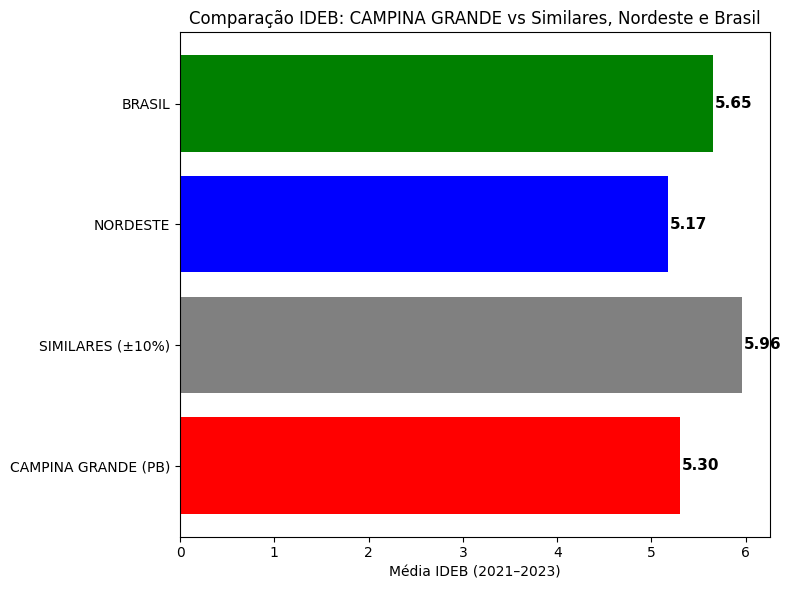

In [115]:
# População de Alagoa Nova (PB)
pop_alagoa = df.loc[
    (df['MUNICIPIO'] == "CAMPINA GRANDE") & (df['SG_UF'] == "PB"),
    'POPULACAO_ESTIMADA'
].squeeze()

# Intervalo de ±10%
limite_inferior = pop_alagoa * 0.9
limite_superior = pop_alagoa * 1.1

# Municípios semelhantes
df_similares = df[(df['POPULACAO_ESTIMADA'] >= limite_inferior) &
                  (df['POPULACAO_ESTIMADA'] <= limite_superior)].copy()

# Médias
media_alagoa = df.loc[
    (df['MUNICIPIO'] == "CAMPINA GRANDE") & (df['SG_UF'] == "PB"),
    'MEDIA_IDEB'
].squeeze()

media_similares = df_similares.loc[
    ~((df_similares['MUNICIPIO'] == "CAMPINA GRANDE") & (df_similares['SG_UF'] == "PB")),
    'MEDIA_IDEB'
].mean()

# Nordeste
ufs_nordeste = ["AL","BA","CE","MA","PB","PE","PI","RN","SE"]
media_nordeste = df.loc[df['SG_UF'].isin(ufs_nordeste), 'MEDIA_IDEB'].mean()

# Brasil
media_brasil = df['MEDIA_IDEB'].mean()

# Comparação final
df_comparacao = pd.DataFrame({
    'MUNICIPIO': ['CAMPINA GRANDE (PB)', 'SIMILARES (±10%)', 'NORDESTE', 'BRASIL'],
    'MEDIA_IDEB': [media_alagoa, media_similares, media_nordeste, media_brasil]
})

# Gráfico comparativo (horizontal)
cores = ['red', 'gray', 'blue', 'green']
plt.figure(figsize=(8,6))
barras = plt.barh(df_comparacao['MUNICIPIO'], df_comparacao['MEDIA_IDEB'], color=cores)
plt.xlabel("Média IDEB (2021–2023)")
plt.title("Comparação IDEB: CAMPINA GRANDE vs Similares, Nordeste e Brasil")

# Adicionar valores ao lado das barras
for barra in barras:
    largura = barra.get_width()
    plt.text(largura + 0.02, 
             barra.get_y() + barra.get_height()/2, 
             f"{largura:.2f}", 
             va='center', ha='left', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

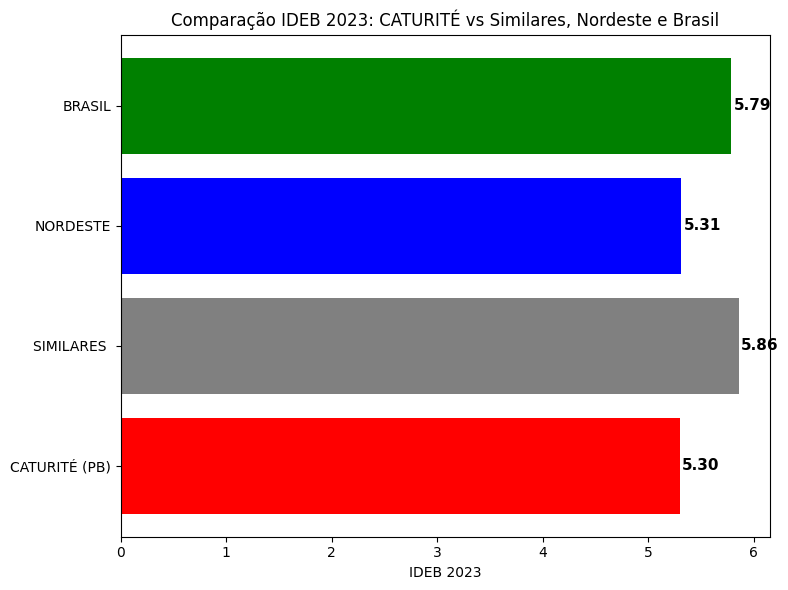

In [116]:
# Converter IDEB 2023 para numérico (garantia)
df['IDEB_2023'] = pd.to_numeric(df['IDEB_2023'], errors='coerce')

# População de Cabaceiras (PB)
pop_alagoa = df.loc[
    (df['MUNICIPIO'] == "CATURITÉ") & (df['SG_UF'] == "PB"),
    'POPULACAO_ESTIMADA'
].squeeze()

# Intervalo de ±10%
limite_inferior = pop_alagoa * 0.9
limite_superior = pop_alagoa * 1.1

# Municípios semelhantes
df_similares = df[(df['POPULACAO_ESTIMADA'] >= limite_inferior) &
                  (df['POPULACAO_ESTIMADA'] <= limite_superior)].copy()

# IDEB 2023
ideb_cabaceiras = df.loc[
    (df['MUNICIPIO'] == "CATURITÉ") & (df['SG_UF'] == "PB"),
    'IDEB_2023'
].squeeze()

ideb_similares = df_similares.loc[
    ~((df_similares['MUNICIPIO'] == "CATURITÉ") & (df_similares['SG_UF'] == "PB")),
    'IDEB_2023'
].mean()

# Nordeste
ufs_nordeste = ["AL","BA","CE","MA","PB","PE","PI","RN","SE"]
ideb_nordeste = df.loc[df['SG_UF'].isin(ufs_nordeste), 'IDEB_2023'].mean()

# Brasil
ideb_brasil = df['IDEB_2023'].mean()

# Comparação final
df_comparacao = pd.DataFrame({
    'MUNICIPIO': ['CATURITÉ (PB)', 'SIMILARES ', 'NORDESTE', 'BRASIL'],
    'IDEB_2023': [ideb_cabaceiras, ideb_similares, ideb_nordeste, ideb_brasil]
})

# Gráfico comparativo (horizontal)
cores = ['red', 'gray', 'blue', 'green']
plt.figure(figsize=(8,6))
barras = plt.barh(df_comparacao['MUNICIPIO'], df_comparacao['IDEB_2023'], color=cores)
plt.xlabel("IDEB 2023")
plt.title("Comparação IDEB 2023: CATURITÉ vs Similares, Nordeste e Brasil")

# Adicionar valores ao lado das barras
for barra in barras:
    largura = barra.get_width()
    plt.text(largura + 0.02, 
             barra.get_y() + barra.get_height()/2, 
             f"{largura:.2f}", 
             va='center', ha='left', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

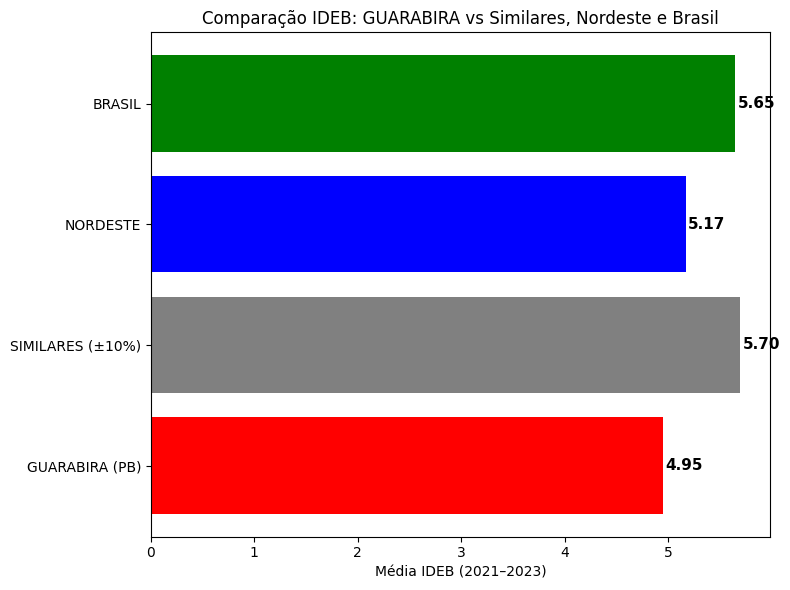

In [117]:
# População de Alagoa Nova (PB)
pop_alagoa = df.loc[
    (df['MUNICIPIO'] == "GUARABIRA") & (df['SG_UF'] == "PB"),
    'POPULACAO_ESTIMADA'
].squeeze()

# Intervalo de ±10%
limite_inferior = pop_alagoa * 0.9
limite_superior = pop_alagoa * 1.1

# Municípios semelhantes
df_similares = df[(df['POPULACAO_ESTIMADA'] >= limite_inferior) &
                  (df['POPULACAO_ESTIMADA'] <= limite_superior)].copy()

# Médias
media_alagoa = df.loc[
    (df['MUNICIPIO'] == "GUARABIRA") & (df['SG_UF'] == "PB"),
    'MEDIA_IDEB'
].squeeze()

media_similares = df_similares.loc[
    ~((df_similares['MUNICIPIO'] == "GUARABIRA") & (df_similares['SG_UF'] == "PB")),
    'MEDIA_IDEB'
].mean()

# Nordeste
ufs_nordeste = ["AL","BA","CE","MA","PB","PE","PI","RN","SE"]
media_nordeste = df.loc[df['SG_UF'].isin(ufs_nordeste), 'MEDIA_IDEB'].mean()

# Brasil
media_brasil = df['MEDIA_IDEB'].mean()

# Comparação final
df_comparacao = pd.DataFrame({
    'MUNICIPIO': ['GUARABIRA (PB)', 'SIMILARES (±10%)', 'NORDESTE', 'BRASIL'],
    'MEDIA_IDEB': [media_alagoa, media_similares, media_nordeste, media_brasil]
})

# Gráfico comparativo (horizontal)
cores = ['red', 'gray', 'blue', 'green']
plt.figure(figsize=(8,6))
barras = plt.barh(df_comparacao['MUNICIPIO'], df_comparacao['MEDIA_IDEB'], color=cores)
plt.xlabel("Média IDEB (2021–2023)")
plt.title("Comparação IDEB: GUARABIRA vs Similares, Nordeste e Brasil")

# Adicionar valores ao lado das barras
for barra in barras:
    largura = barra.get_width()
    plt.text(largura + 0.02, 
             barra.get_y() + barra.get_height()/2, 
             f"{largura:.2f}", 
             va='center', ha='left', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

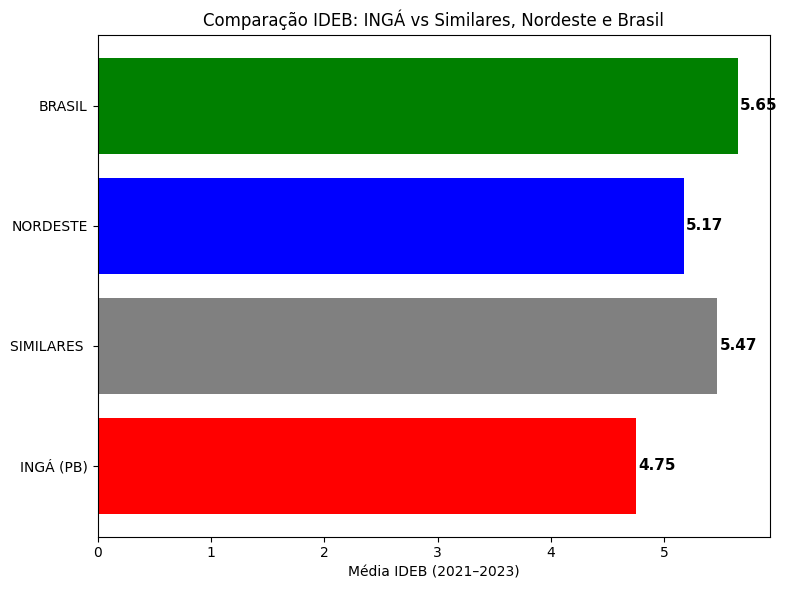

In [118]:
# População de Alagoa Nova (PB)
pop_alagoa = df.loc[
    (df['MUNICIPIO'] == "INGÁ") & (df['SG_UF'] == "PB"),
    'POPULACAO_ESTIMADA'
].squeeze()

# Intervalo de ±10%
limite_inferior = pop_alagoa * 0.9
limite_superior = pop_alagoa * 1.1

# Municípios semelhantes
df_similares = df[(df['POPULACAO_ESTIMADA'] >= limite_inferior) &
                  (df['POPULACAO_ESTIMADA'] <= limite_superior)].copy()

# Médias
media_alagoa = df.loc[
    (df['MUNICIPIO'] == "INGÁ") & (df['SG_UF'] == "PB"),
    'MEDIA_IDEB'
].squeeze()

media_similares = df_similares.loc[
    ~((df_similares['MUNICIPIO'] == "INGÁ") & (df_similares['SG_UF'] == "PB")),
    'MEDIA_IDEB'
].mean()

# Nordeste
ufs_nordeste = ["AL","BA","CE","MA","PB","PE","PI","RN","SE"]
media_nordeste = df.loc[df['SG_UF'].isin(ufs_nordeste), 'MEDIA_IDEB'].mean()

# Brasil
media_brasil = df['MEDIA_IDEB'].mean()

# Comparação final
df_comparacao = pd.DataFrame({
    'MUNICIPIO': ['INGÁ (PB)', 'SIMILARES ', 'NORDESTE', 'BRASIL'],
    'MEDIA_IDEB': [media_alagoa, media_similares, media_nordeste, media_brasil]
})

# Gráfico comparativo (horizontal)
cores = ['red', 'gray', 'blue', 'green']
plt.figure(figsize=(8,6))
barras = plt.barh(df_comparacao['MUNICIPIO'], df_comparacao['MEDIA_IDEB'], color=cores)
plt.xlabel("Média IDEB (2021–2023)")
plt.title("Comparação IDEB: INGÁ vs Similares, Nordeste e Brasil")

# Adicionar valores ao lado das barras
for barra in barras:
    largura = barra.get_width()
    plt.text(largura + 0.02, 
             barra.get_y() + barra.get_height()/2, 
             f"{largura:.2f}", 
             va='center', ha='left', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

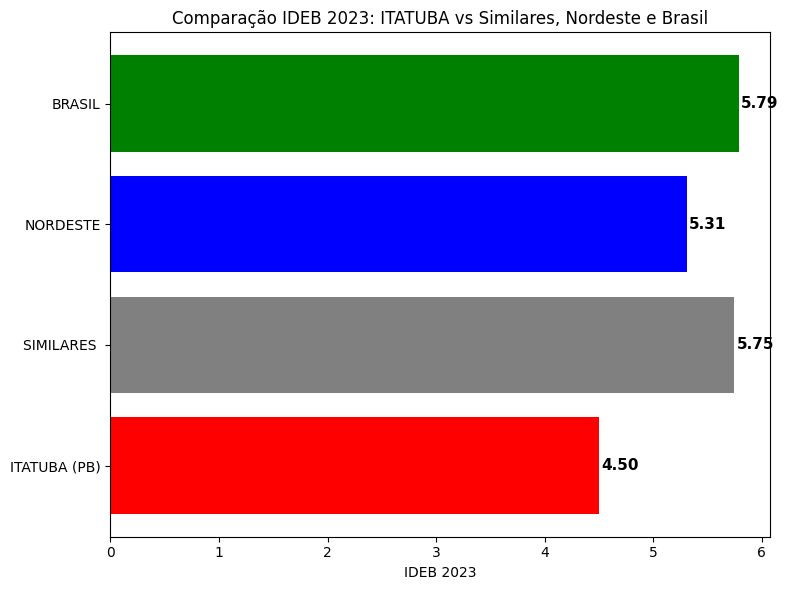

In [120]:
# Converter IDEB 2023 para numérico (garantia)
df['IDEB_2023'] = pd.to_numeric(df['IDEB_2023'], errors='coerce')

# População de Cabaceiras (PB)
pop_alagoa = df.loc[
    (df['MUNICIPIO'] == "ITATUBA") & (df['SG_UF'] == "PB"),
    'POPULACAO_ESTIMADA'
].squeeze()

# Intervalo de ±10%
limite_inferior = pop_alagoa * 0.9
limite_superior = pop_alagoa * 1.1

# Municípios semelhantes
df_similares = df[(df['POPULACAO_ESTIMADA'] >= limite_inferior) &
                  (df['POPULACAO_ESTIMADA'] <= limite_superior)].copy()

# IDEB 2023
ideb_cabaceiras = df.loc[
    (df['MUNICIPIO'] == "ITATUBA") & (df['SG_UF'] == "PB"),
    'IDEB_2023'
].squeeze()

ideb_similares = df_similares.loc[
    ~((df_similares['MUNICIPIO'] == "ITATUBA") & (df_similares['SG_UF'] == "PB")),
    'IDEB_2023'
].mean()

# Nordeste
ufs_nordeste = ["AL","BA","CE","MA","PB","PE","PI","RN","SE"]
ideb_nordeste = df.loc[df['SG_UF'].isin(ufs_nordeste), 'IDEB_2023'].mean()

# Brasil
ideb_brasil = df['IDEB_2023'].mean()

# Comparação final
df_comparacao = pd.DataFrame({
    'MUNICIPIO': ['ITATUBA (PB)', 'SIMILARES ', 'NORDESTE', 'BRASIL'],
    'IDEB_2023': [ideb_cabaceiras, ideb_similares, ideb_nordeste, ideb_brasil]
})

# Gráfico comparativo (horizontal)
cores = ['red', 'gray', 'blue', 'green']
plt.figure(figsize=(8,6))
barras = plt.barh(df_comparacao['MUNICIPIO'], df_comparacao['IDEB_2023'], color=cores)
plt.xlabel("IDEB 2023")
plt.title("Comparação IDEB 2023: ITATUBA vs Similares, Nordeste e Brasil")

# Adicionar valores ao lado das barras
for barra in barras:
    largura = barra.get_width()
    plt.text(largura + 0.02, 
             barra.get_y() + barra.get_height()/2, 
             f"{largura:.2f}", 
             va='center', ha='left', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

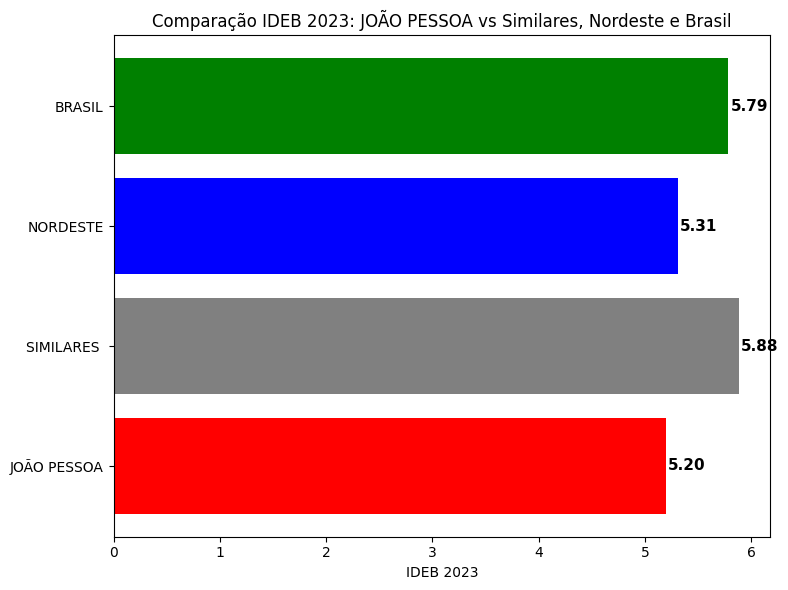

In [121]:
# Converter IDEB 2023 para numérico (garantia)
df['IDEB_2023'] = pd.to_numeric(df['IDEB_2023'], errors='coerce')

# População de Cabaceiras (PB)
pop_alagoa = df.loc[
    (df['MUNICIPIO'] == "JOÃO PESSOA") & (df['SG_UF'] == "PB"),
    'POPULACAO_ESTIMADA'
].squeeze()

# Intervalo de ±10%
limite_inferior = pop_alagoa * 0.9
limite_superior = pop_alagoa * 1.1

# Municípios semelhantes
df_similares = df[(df['POPULACAO_ESTIMADA'] >= limite_inferior) &
                  (df['POPULACAO_ESTIMADA'] <= limite_superior)].copy()

# IDEB 2023
ideb_cabaceiras = df.loc[
    (df['MUNICIPIO'] == "JOÃO PESSOA") & (df['SG_UF'] == "PB"),
    'IDEB_2023'
].squeeze()

ideb_similares = df_similares.loc[
    ~((df_similares['MUNICIPIO'] == "JOÃO PESSOA") & (df_similares['SG_UF'] == "PB")),
    'IDEB_2023'
].mean()

# Nordeste
ufs_nordeste = ["AL","BA","CE","MA","PB","PE","PI","RN","SE"]
ideb_nordeste = df.loc[df['SG_UF'].isin(ufs_nordeste), 'IDEB_2023'].mean()

# Brasil
ideb_brasil = df['IDEB_2023'].mean()

# Comparação final
df_comparacao = pd.DataFrame({
    'MUNICIPIO': ['JOÃO PESSOA', 'SIMILARES ', 'NORDESTE', 'BRASIL'],
    'IDEB_2023': [ideb_cabaceiras, ideb_similares, ideb_nordeste, ideb_brasil]
})

# Gráfico comparativo (horizontal)
cores = ['red', 'gray', 'blue', 'green']
plt.figure(figsize=(8,6))
barras = plt.barh(df_comparacao['MUNICIPIO'], df_comparacao['IDEB_2023'], color=cores)
plt.xlabel("IDEB 2023")
plt.title("Comparação IDEB 2023: JOÃO PESSOA vs Similares, Nordeste e Brasil")

# Adicionar valores ao lado das barras
for barra in barras:
    largura = barra.get_width()
    plt.text(largura + 0.02, 
             barra.get_y() + barra.get_height()/2, 
             f"{largura:.2f}", 
             va='center', ha='left', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

- LAGOASECA	PB 2021 ha 2024
- MOGEIRO	PB 2020
- QUEIMADAS	PB 2022
- SANTARITA	PB 2020
- SERRAREDONDA	PB 2020


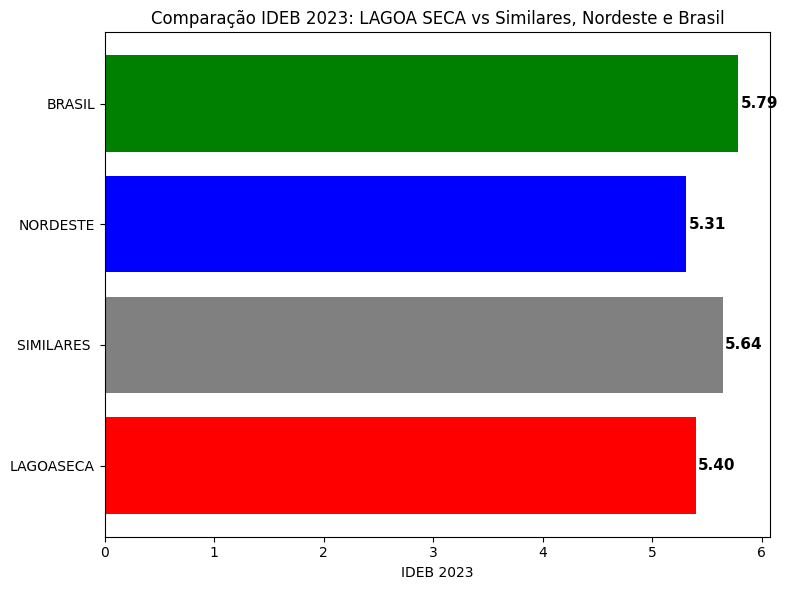

In [124]:
# Converter IDEB 2023 para numérico (garantia)
df['IDEB_2023'] = pd.to_numeric(df['IDEB_2023'], errors='coerce')

# População de Cabaceiras (PB)
pop_alagoa = df.loc[
    (df['MUNICIPIO'] == "LAGOA SECA") & (df['SG_UF'] == "PB"),
    'POPULACAO_ESTIMADA'
].squeeze()

# Intervalo de ±10%
limite_inferior = pop_alagoa * 0.9
limite_superior = pop_alagoa * 1.1

# Municípios semelhantes
df_similares = df[(df['POPULACAO_ESTIMADA'] >= limite_inferior) &
                  (df['POPULACAO_ESTIMADA'] <= limite_superior)].copy()

# IDEB 2023
ideb_cabaceiras = df.loc[
    (df['MUNICIPIO'] == "LAGOA SECA") & (df['SG_UF'] == "PB"),
    'IDEB_2023'
].squeeze()

ideb_similares = df_similares.loc[
    ~((df_similares['MUNICIPIO'] == "LAGOA SECA") & (df_similares['SG_UF'] == "PB")),
    'IDEB_2023'
].mean()

# Nordeste
ufs_nordeste = ["AL","BA","CE","MA","PB","PE","PI","RN","SE"]
ideb_nordeste = df.loc[df['SG_UF'].isin(ufs_nordeste), 'IDEB_2023'].mean()

# Brasil
ideb_brasil = df['IDEB_2023'].mean()

# Comparação final
df_comparacao = pd.DataFrame({
    'MUNICIPIO': ['LAGOASECA', 'SIMILARES ', 'NORDESTE', 'BRASIL'],
    'IDEB_2023': [ideb_cabaceiras, ideb_similares, ideb_nordeste, ideb_brasil]
})

# Gráfico comparativo (horizontal)
cores = ['red', 'gray', 'blue', 'green']
plt.figure(figsize=(8,6))
barras = plt.barh(df_comparacao['MUNICIPIO'], df_comparacao['IDEB_2023'], color=cores)
plt.xlabel("IDEB 2023")
plt.title("Comparação IDEB 2023: LAGOA SECA vs Similares, Nordeste e Brasil")

# Adicionar valores ao lado das barras
for barra in barras:
    largura = barra.get_width()
    plt.text(largura + 0.02, 
             barra.get_y() + barra.get_height()/2, 
             f"{largura:.2f}", 
             va='center', ha='left', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

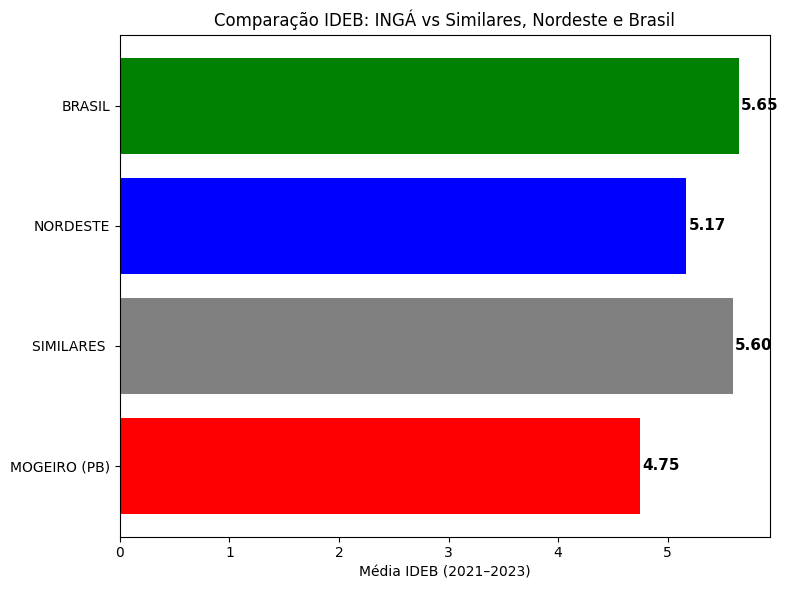

In [ ]:
# População de Alagoa Nova (PB)
pop_alagoa = df.loc[
    (df['MUNICIPIO'] == "MOGEIRO") & (df['SG_UF'] == "PB"),
    'POPULACAO_ESTIMADA'
].squeeze()

# Intervalo de ±10%
limite_inferior = pop_alagoa * 0.9
limite_superior = pop_alagoa * 1.1

# Municípios semelhantes
df_similares = df[(df['POPULACAO_ESTIMADA'] >= limite_inferior) &
                  (df['POPULACAO_ESTIMADA'] <= limite_superior)].copy()

# Médias
media_alagoa = df.loc[
    (df['MUNICIPIO'] == "MOGEIRO") & (df['SG_UF'] == "PB"),
    'MEDIA_IDEB'
].squeeze()

media_similares = df_similares.loc[
    ~((df_similares['MUNICIPIO'] == "MOGEIRO") & (df_similares['SG_UF'] == "PB")),
    'MEDIA_IDEB'
].mean()

# Nordeste
ufs_nordeste = ["AL","BA","CE","MA","PB","PE","PI","RN","SE"]
media_nordeste = df.loc[df['SG_UF'].isin(ufs_nordeste), 'MEDIA_IDEB'].mean()

# Brasil
media_brasil = df['MEDIA_IDEB'].mean()

# Comparação final
df_comparacao = pd.DataFrame({
    'MUNICIPIO': ['MOGEIRO (PB)', 'SIMILARES ', 'NORDESTE', 'BRASIL'],
    'MEDIA_IDEB': [media_alagoa, media_similares, media_nordeste, media_brasil]
})

# Gráfico comparativo (horizontal)
cores = ['red', 'gray', 'blue', 'green']
plt.figure(figsize=(8,6))
barras = plt.barh(df_comparacao['MUNICIPIO'], df_comparacao['MEDIA_IDEB'], color=cores)
plt.xlabel("Média IDEB (2021–2023)")
plt.title("Comparação IDEB: MOGEIRO vs Similares, Nordeste e Brasil")

# Adicionar valores ao lado das barras
for barra in barras:
    largura = barra.get_width()
    plt.text(largura + 0.02, 
             barra.get_y() + barra.get_height()/2, 
             f"{largura:.2f}", 
             va='center', ha='left', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

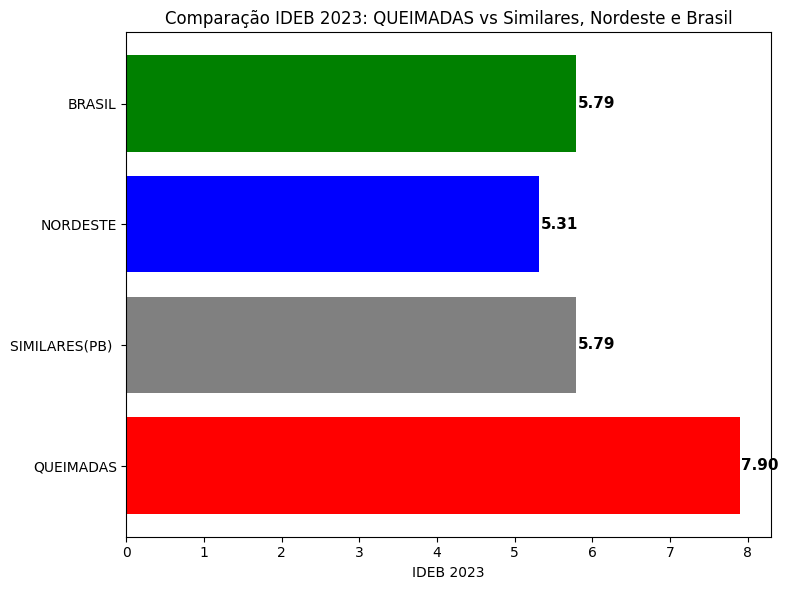

In [126]:
# Converter IDEB 2023 para numérico (garantia)
df['IDEB_2023'] = pd.to_numeric(df['IDEB_2023'], errors='coerce')

# População de Cabaceiras (PB)
pop_alagoa = df.loc[
    (df['MUNICIPIO'] == "QUEIMADAS") & (df['SG_UF'] == "PB"),
    'POPULACAO_ESTIMADA'
].squeeze()

# Intervalo de ±10%
limite_inferior = pop_alagoa * 0.9
limite_superior = pop_alagoa * 1.1

# Municípios semelhantes
df_similares = df[(df['POPULACAO_ESTIMADA'] >= limite_inferior) &
                  (df['POPULACAO_ESTIMADA'] <= limite_superior)].copy()

# IDEB 2023
ideb_cabaceiras = df.loc[
    (df['MUNICIPIO'] == "QUEIMADAS") & (df['SG_UF'] == "PB"),
    'IDEB_2023'
].squeeze()

ideb_similares = df_similares.loc[
    ~((df_similares['MUNICIPIO'] == "QUEIMADAS") & (df_similares['SG_UF'] == "PB")),
    'IDEB_2023'
].mean()

# Nordeste
ufs_nordeste = ["AL","BA","CE","MA","PB","PE","PI","RN","SE"]
ideb_nordeste = df.loc[df['SG_UF'].isin(ufs_nordeste), 'IDEB_2023'].mean()

# Brasil
ideb_brasil = df['IDEB_2023'].mean()

# Comparação final
df_comparacao = pd.DataFrame({
    'MUNICIPIO': ['QUEIMADAS', 'SIMILARES(PB) ', 'NORDESTE', 'BRASIL'],
    'IDEB_2023': [ideb_cabaceiras, ideb_similares, ideb_nordeste, ideb_brasil]
})

# Gráfico comparativo (horizontal)
cores = ['red', 'gray', 'blue', 'green']
plt.figure(figsize=(8,6))
barras = plt.barh(df_comparacao['MUNICIPIO'], df_comparacao['IDEB_2023'], color=cores)
plt.xlabel("IDEB 2023")
plt.title("Comparação IDEB 2023: QUEIMADAS vs Similares, Nordeste e Brasil")

# Adicionar valores ao lado das barras
for barra in barras:
    largura = barra.get_width()
    plt.text(largura + 0.02, 
             barra.get_y() + barra.get_height()/2, 
             f"{largura:.2f}", 
             va='center', ha='left', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

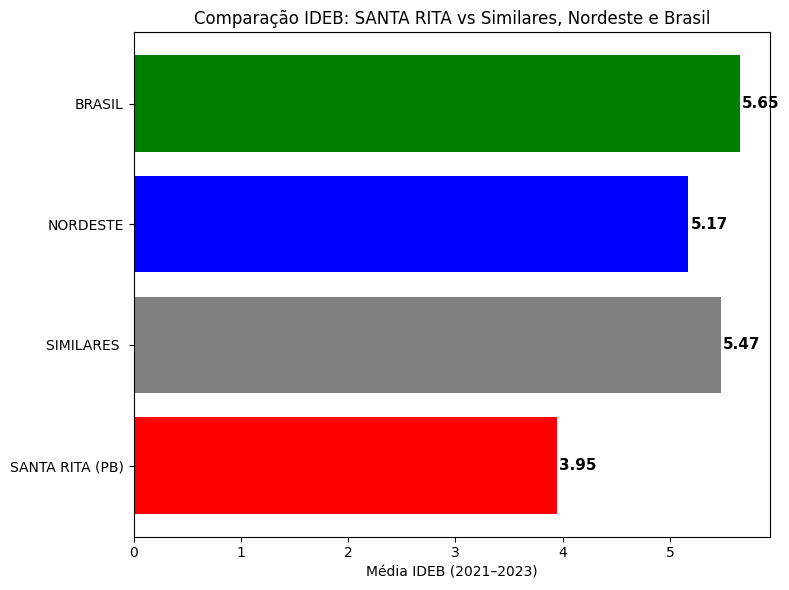

In [128]:
# População de Alagoa Nova (PB)
pop_alagoa = df.loc[
    (df['MUNICIPIO'] == "SANTA RITA") & (df['SG_UF'] == "PB"),
    'POPULACAO_ESTIMADA'
].squeeze()

# Intervalo de ±10%
limite_inferior = pop_alagoa * 0.9
limite_superior = pop_alagoa * 1.1

# Municípios semelhantes
df_similares = df[(df['POPULACAO_ESTIMADA'] >= limite_inferior) &
                  (df['POPULACAO_ESTIMADA'] <= limite_superior)].copy()

# Médias
media_alagoa = df.loc[
    (df['MUNICIPIO'] == "SANTA RITA") & (df['SG_UF'] == "PB"),
    'MEDIA_IDEB'
].squeeze()

media_similares = df_similares.loc[
    ~((df_similares['MUNICIPIO'] == "SANTA RITA") & (df_similares['SG_UF'] == "PB")),
    'MEDIA_IDEB'
].mean()

# Nordeste
ufs_nordeste = ["AL","BA","CE","MA","PB","PE","PI","RN","SE"]
media_nordeste = df.loc[df['SG_UF'].isin(ufs_nordeste), 'MEDIA_IDEB'].mean()

# Brasil
media_brasil = df['MEDIA_IDEB'].mean()

# Comparação final
df_comparacao = pd.DataFrame({
    'MUNICIPIO': ['SANTA RITA (PB)', 'SIMILARES ', 'NORDESTE', 'BRASIL'],
    'MEDIA_IDEB': [media_alagoa, media_similares, media_nordeste, media_brasil]
})

# Gráfico comparativo (horizontal)
cores = ['red', 'gray', 'blue', 'green']
plt.figure(figsize=(8,6))
barras = plt.barh(df_comparacao['MUNICIPIO'], df_comparacao['MEDIA_IDEB'], color=cores)
plt.xlabel("Média IDEB (2021–2023)")
plt.title("Comparação IDEB: SANTA RITA vs Similares, Nordeste e Brasil")

# Adicionar valores ao lado das barras
for barra in barras:
    largura = barra.get_width()
    plt.text(largura + 0.02, 
             barra.get_y() + barra.get_height()/2, 
             f"{largura:.2f}", 
             va='center', ha='left', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

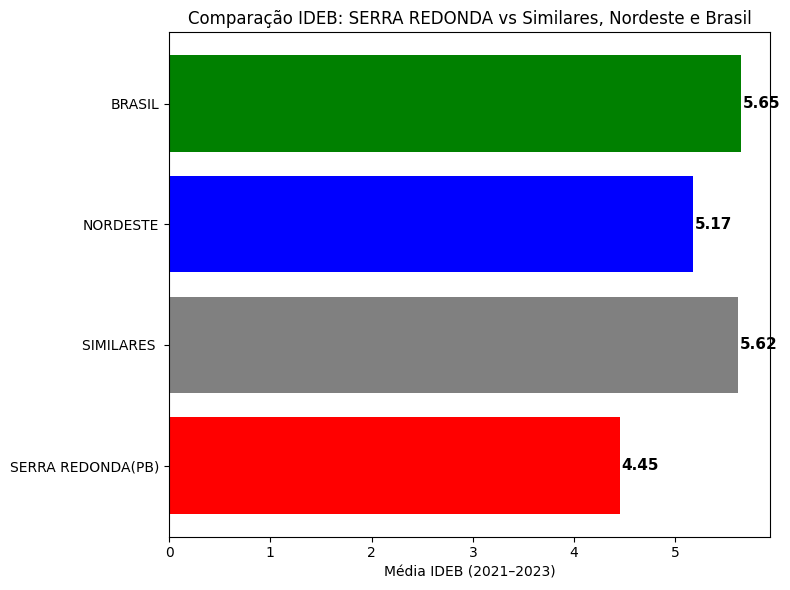

In [131]:
# População de Alagoa Nova (PB)
pop_alagoa = df.loc[
    (df['MUNICIPIO'] == "SERRA REDONDA") & (df['SG_UF'] == "PB"),
    'POPULACAO_ESTIMADA'
].squeeze()

# Intervalo de ±10%
limite_inferior = pop_alagoa * 0.9
limite_superior = pop_alagoa * 1.1

# Municípios semelhantes
df_similares = df[(df['POPULACAO_ESTIMADA'] >= limite_inferior) &
                  (df['POPULACAO_ESTIMADA'] <= limite_superior)].copy()

# Médias
media_alagoa = df.loc[
    (df['MUNICIPIO'] == "SERRA REDONDA") & (df['SG_UF'] == "PB"),
    'MEDIA_IDEB'
].squeeze()

media_similares = df_similares.loc[
    ~((df_similares['MUNICIPIO'] == "SANTA RITA") & (df_similares['SG_UF'] == "PB")),
    'MEDIA_IDEB'
].mean()

# Nordeste
ufs_nordeste = ["AL","BA","CE","MA","PB","PE","PI","RN","SE"]
media_nordeste = df.loc[df['SG_UF'].isin(ufs_nordeste), 'MEDIA_IDEB'].mean()

# Brasil
media_brasil = df['MEDIA_IDEB'].mean()

# Comparação final
df_comparacao = pd.DataFrame({
    'MUNICIPIO': ['SERRA REDONDA(PB)', 'SIMILARES ', 'NORDESTE', 'BRASIL'],
    'MEDIA_IDEB': [media_alagoa, media_similares, media_nordeste, media_brasil]
})

# Gráfico comparativo (horizontal)
cores = ['red', 'gray', 'blue', 'green']
plt.figure(figsize=(8,6))
barras = plt.barh(df_comparacao['MUNICIPIO'], df_comparacao['MEDIA_IDEB'], color=cores)
plt.xlabel("Média IDEB (2021–2023)")
plt.title("Comparação IDEB: SERRA REDONDA vs Similares, Nordeste e Brasil")

# Adicionar valores ao lado das barras
for barra in barras:
    largura = barra.get_width()
    plt.text(largura + 0.02, 
             barra.get_y() + barra.get_height()/2, 
             f"{largura:.2f}", 
             va='center', ha='left', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()